In [3]:
import os
import time
import requests
from concurrent.futures import ThreadPoolExecutor

def download_file(url, filename):
    response = requests.get(url, stream=True)
    with open(filename, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

def download_chunk(url, start, end, filename):
    headers = {'Range': f'bytes={start}-{end}'}
    response = requests.get(url, headers=headers, stream=True)
    print(start, end)
    if response.status_code == 206:
        with open(filename, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)

def multi_threaded_download(url, num_threads=4):
    response = requests.head(url)
    file_size = int(response.headers['content-length'])
    chunk_size = file_size // num_threads
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        futures = []
        for i in range(num_threads):
            start = i * chunk_size
            end = start + chunk_size - 1
            if i == num_threads - 1:
                end = file_size - 1
            part_filename = f'part_{i}.tmp'
            futures.append(executor.submit(download_chunk, url, start, end, part_filename))
        for future in futures:
            future.result()

    with open("output_file_mt", "wb") as final_file:
        for i in range(num_threads):
            part_filename = f'part_{i}.tmp'
            with open(part_filename, "rb") as part_file:
                final_file.write(part_file.read())
            os.remove(part_filename)

def single_thread_download(url):
    download_file(url, "output_file_st")

# 测试链接和下载
url = 'http://ipv4.download.thinkbroadband.com/100MB.zip'

start_time = time.time()
single_thread_download(url)
single_time = time.time() - start_time

start_time = time.time()
multi_threaded_download(url)
multi_time = time.time() - start_time

print(f"Single-threaded download time: {single_time} seconds")
print(f"Multi-threaded download time: {multi_time} seconds")


052428800 78643199
26214400 52428799
78643200 104857599
 26214399
Single-threaded download time: 36.02476406097412 seconds
Multi-threaded download time: 39.993539571762085 seconds


In [ ]:
# Usage example
url = 'YOUR_DOWNLOAD_URL_HERE'
multi_threaded_download(url)

In [6]:
a = '''
Restaurants
Takeout
Delivery
Reservations
Burgers
Home Services
Contractors
Electricians
Home Cleaners
HVAC
Shopping
Nightlife
Active Life
Beauty & Spas
Automotive
Usual Search
'''
print(a.split('\n'))

['', 'Restaurants', 'Takeout', 'Delivery', 'Reservations', 'Burgers', 'Home Services', 'Contractors', 'Electricians', 'Home Cleaners', 'HVAC', 'Shopping', 'Nightlife', 'Active Life', 'Beauty & Spas', 'Automotive', 'Usual Search', '']


In [7]:
import Celestial-Vault

SyntaxError: invalid syntax (3392555278.py, line 1)

In [29]:
import httpx
import urllib.parse

# 设置请求头
headers = {
    "Accept": "text/html, */*; q=0.01",
    "Accept-Encoding": "gzip, deflate, br, zstd",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
    "Cookie": "eng_k55_id=015106; Ecp_ClientId=n240530105000408699; firstEnterUrlInSession=https%3A//www.cnki.net/index/; Ecp_IpLoginFail=240530167.220.232.161; VisitorCapacity=1; ASP.NET_SessionId=eo1ucf3cp2lx30ttvijeph52; pageReferrInSession=https%3A//www.cnki.net/index/; knsLeftGroupSelectItem=1%3B2%3B; CurrSortField=Relevance%2frelevant%2c(%e5%8f%91%e8%a1%a8%e6%97%b6%e9%97%b4%2c%27time%27)+desc; CurrSortFieldType=desc; Ecp_ClientIp=-1; dblang=ch; tfstk=f4ZmC-M8drubS19Oiumf4HiO2q_-lIisa5Kt6chNzblWMIKYQf4ggS0ZWtGTZ1VuCjrOhOiMb7wEBrhxHODZaS0TXtt9hzNLLnEAlcKicciN96IdvKwjfcSPmxoEG8ySQr9Hzw2bhc95FbXqq-Tg8IBFncPZ43ksQckqghWkavGy0A-qQQWoCblZbq-aULknQCkZ3jLpbXqaVuWpyoS_UzZYqx0PJ-lyRjronqcU3oxwbdMmoXyqZ6pGT90zCVq6Ch0L3yNsLSRVsfZuUozUT_LxgyDgpPVhYhM7uSqrSuB1x8nmI2oZrd-aE0lZ-onFYQD7z-UacSvMbxZYvVcIrO-sW0rK8yPDC9wr0APsRlCBcjyadkaKxiAInzynqgyXzellIhMPBu865qkSEX1XSyvkPZ-3UTXkRZgqFxCdETY65qkSEXBlEeOjuYMA9",
    "Host": "www.cnki.net",
    "Origin": "https://www.cnki.net",
    "Referer": "https://www.cnki.net/kns/defaultresult/index",
    "Sec-Ch-Ua": '"Chromium";v="124", "Microsoft Edge";v="124", "Not-A.Brand";v="99"',
    "Sec-Ch-Ua-Mobile": "?0",
    "Sec-Ch-Ua-Platform": '"Windows"',
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-origin",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36 Edg/124.0.0.0",
    "X-Requested-With": "XMLHttpRequest"
}

# 设置请求 payload
payload = {
    "IsSearch": True,
    "QueryJson": "{\"Platform\":\"\",\"DBCode\":\"CFLS\",\"KuaKuCode\":\"CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFN\",\"QNode\":{\"QGroup\":[{\"Key\":\"Subject\",\"Title\":\"\",\"Logic\":1,\"Items\":[{\"Title\":\"Subject\",\"Name\":\"SU\",\"Value\":\"糖尿病\",\"Operate\":\"%\",\"BlurType\":\"\"}],\"ChildItems\":[]}]},\"CodeLang\":\"ch\"}",
    "PageName": "defaultresult",
    "DBCode": "CFLS",
    "KuaKuCodes": "CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFN",
    "CurPage": 1,
    "RecordsCntPerPage": 20,
    "CurDisplayMode": "listmode",
    "CurrSortField": "",
    "CurrSortFieldType": "desc",
    "IsSentenceSearch": False,
    "Subject": ""
}

# 将payload转换为URL编码的字符串
encoded_payload = urllib.parse.urlencode(payload)

# 发送POST请求
response = httpx.post('https://www.cnki.net/kns/Brief/GetGridTableHtml', headers=headers, data=encoded_payload)

# 输出响应内容
print(response.text)


<form method="post" name="gridTableForm">
    <div id="gridTable" class="search-result">
<div class='toolbar'><div id="countPageDiv" class="result-con-r"><span class='pagerTitleCell'>Total:<em>518,956</em>  articles</span><span class='countPageMark'>1/300</span><span class='topTurnSpan'><a id='Page_next_top' title='“← →” Turn Page' data-curPage='2'>>></a></span></div><div class='toolbar-col toolbar-oth'>
        <div class="checkcount">
            <label class="checkAll"><input type="checkbox" name="selectCheckbox" id="selectCheckAll1"  onclick="$(this).filenameClick()">All</label>
            <span>Selected:</span>
            <em title='Click to check selected literature' id='selectCount' name='selectCount' onclick='window.open(APPPATH + "/manage.html?subject="+GetQueryStringByName("subject"))'tabindex="0" >0</em>
            <a href="javascript:$.filenameClear();">Clear</a>
          </div> 
          <div class="toolbar-mod">
            <ul class="dropdown-analysis-btns" id="batc

In [54]:
import httpx
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urlencode

def simplify_url(original_url):
    # 解析原始URL
    parsed_url = urlparse(original_url)
    query_params = parse_qs(parsed_url.query)

    # 提取所需的参数，注意大小写
    required_params = {}
    if 'dbcode' in query_params:
        required_params['dbcode'] = query_params['dbcode']
    if 'DbCode' in query_params:
        required_params['DbCode'] = query_params['DbCode']
    if 'filename' in query_params:
        required_params['filename'] = query_params['filename']
    if 'FileName' in query_params:
        required_params['FileName'] = query_params['FileName']

    # 重新构建URL
    simplified_url = f"https://www.cnki.net/KCMS/detail/detail.aspx?{urlencode(required_params, doseq=True)}"
    return simplified_url

def get_ab_key(url):
    content_ab = httpx.get('https://www.cnki.net/KCMS/detail/detail.aspx?DbCode=CAPJ&FileName=XHYX20240523001', ).text
    soup = BeautifulSoup(content_ab, 'html.parser')
    
    # 提取摘要
    abstract = soup.find('span', {'id': 'ChDivSummary'}).get_text(strip=True)
    
    # 提取关键词
    keywords = soup.find('p', {'class': 'keywords'}).get_text(separator='; ', strip=True)
    return abstract, keywords



# 设置请求头
headers = {
    "Accept": "text/html, */*; q=0.01",
    "Accept-Encoding": "gzip, deflate, br, zstd",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
    "Cookie": "eng_k55_id=015106; Ecp_ClientId=n240530105000408699; firstEnterUrlInSession=https%3A//www.cnki.net/index/; Ecp_IpLoginFail=240530167.220.232.161; VisitorCapacity=1; ASP.NET_SessionId=eo1ucf3cp2lx30ttvijeph52; pageReferrInSession=https%3A//www.cnki.net/index/; knsLeftGroupSelectItem=1%3B2%3B; CurrSortField=Relevance%2frelevant%2c(%e5%8f%91%e8%a1%a8%e6%97%b6%e9%97%b4%2c%27time%27)+desc; CurrSortFieldType=desc; Ecp_ClientIp=-1; dblang=ch; tfstk=f4ZmC-M8drubS19Oiumf4HiO2q_-lIisa5Kt6chNzblWMIKYQf4ggS0ZWtGTZ1VuCjrOhOiMb7wEBrhxHODZaS0TXtt9hzNLLnEAlcKicciN96IdvKwjfcSPmxoEG8ySQr9Hzw2bhc95FbXqq-Tg8IBFncPZ43ksQckqghWkavGy0A-qQQWoCblZbq-aULknQCkZ3jLpbXqaVuWpyoS_UzZYqx0PJ-lyRjronqcU3oxwbdMmoXyqZ6pGT90zCVq6Ch0L3yNsLSRVsfZuUozUT_LxgyDgpPVhYhM7uSqrSuB1x8nmI2oZrd-aE0lZ-onFYQD7z-UacSvMbxZYvVcIrO-sW0rK8yPDC9wr0APsRlCBcjyadkaKxiAInzynqgyXzellIhMPBu865qkSEX1XSyvkPZ-3UTXkRZgqFxCdETY65qkSEXBlEeOjuYMA9",
    "Host": "www.cnki.net",
    "Origin": "https://www.cnki.net",
    "Referer": "https://www.cnki.net/kns/defaultresult/index",
    "Sec-Ch-Ua": '"Chromium";v="124", "Microsoft Edge";v="124", "Not-A.Brand";v="99"',
    "Sec-Ch-Ua-Mobile": "?0",
    "Sec-Ch-Ua-Platform": '"Windows"',
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-origin",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36 Edg/124.0.0.0",
    "X-Requested-With": "XMLHttpRequest"
}

# 设置请求 payload
payload = {
    "IsSearch": True,
    "QueryJson": "{\"Platform\":\"\",\"DBCode\":\"CFLS\",\"KuaKuCode\":\"CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFN\",\"QNode\":{\"QGroup\":[{\"Key\":\"Subject\",\"Title\":\"\",\"Logic\":1,\"Items\":[{\"Title\":\"Subject\",\"Name\":\"SU\",\"Value\":\"糖尿病\",\"Operate\":\"%\",\"BlurType\":\"\"}],\"ChildItems\":[]}]},\"CodeLang\":\"ch\"}",
    "PageName": "defaultresult",
    "DBCode": "CFLS",
    "KuaKuCodes": "CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFN",
    "CurPage": 2,
    "RecordsCntPerPage": 20,
    "CurDisplayMode": "listmode",
    "CurrSortField": "",
    "CurrSortFieldType": "desc",
    "IsSentenceSearch": False,
    "Subject": ""
}

# 将payload转换为URL编码的字符串
encoded_payload = urlencode(payload)

# 发送POST请求
response = httpx.post('https://www.cnki.net/kns/Brief/GetGridTableHtml', headers=headers, data=encoded_payload)
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Extract data from the table
data = []
rows = soup.find("table", class_="result-table-list").find_all('tr')
for row in rows:
    title_tag = row.find('td', class_='name')
    if not title_tag:
        continue
    title = title_tag.find('a').text.strip()
    url = simplify_url(title_tag.find('a')['href'])
    author = row.find('td', class_='author').text.strip()
    source = row.find('td', class_='source').text.strip()
    date = row.find('td', class_='date').text.strip()
    data_type = row.find('td', class_='data').text.strip()
    quote = row.find('td', class_='quote').text.strip()
    keywords = ""
    abstract = ""
    
    data.append({
        'Title': title,
        'URL': url,
        'Author': author,
        'Source': source,
        'Date': date,
        'Database': data_type,
        'Quote': quote,
        'Keywords': keywords,
        'Abstract': abstract
    })

# Create a DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv('papers(new).csv', index=False)
data

[{'Title': 'Guideline for the Management of Diabetes Mellitus in the Elderly in China (2024 edition)',
  'URL': 'https://www.cnki.net/KCMS/detail/detail.aspx?DbCode=CAPJ&FileName=XHYX20240523001',
  'Author': 'National Center of Gerontology;Chinese Society of Geriatrics;Diabetes Professional Committee of Chinese Aging Well Association;GUO Lixin;XIAO Xinhua',
  'Source': 'Medical Journal of Peking Union Medical College Hospital',
  'Date': '2024-05-28 15:22',
  'Database': 'Journals',
  'Quote': '',
  'Keywords': '',
  'Abstract': ''},
 {'Title': 'Diabetes burden in China from 1999 to 2019',
  'URL': 'https://www.cnki.net/KCMS/detail/detail.aspx?DbCode=CAPJ&FileName=JFJY20240515001',
  'Author': 'Li Zan;Liu Xi-Yang;He Zhuo-Jia;Ma Shuang',
  'Source': "Medical Journal of Chinese People's Liberation Army",
  'Date': '2024-05-21 14:42',
  'Database': 'Journals',
  'Quote': '',
  'Keywords': '',
  'Abstract': ''},
 {'Title': 'Discussion on the treatment for Diabetes Mellitus with modificati

In [87]:
import httpx
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urlencode

def simplify_url(original_url):
    # 解析原始URL
    parsed_url = urlparse(original_url)
    query_params = parse_qs(parsed_url.query)

    # 提取所需的参数，注意大小写
    required_params = {}
    for key in ['dbcode', 'DbCode', 'filename', 'FileName']:
        if key in query_params:
            required_params[key.lower()] = query_params[key][0]

    # 重新构建URL
    simplified_url = f"https://www.cnki.net/KCMS/detail/detail.aspx?{urlencode(required_params, doseq=True)}"
    return simplified_url

def get_ab_key(url):
    # 发送GET请求并解析页面内容
    response = httpx.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 提取摘要
    abstract_tag = soup.find('span', {'id': 'ChDivSummary'})
    abstract = abstract_tag.get_text(strip=True) if abstract_tag else ""

    # 提取关键词
    keywords_tag = soup.find('p', {'class': 'keywords'})
    keywords = keywords_tag.get_text(separator='; ', strip=True) if keywords_tag else ""

    return abstract, keywords

# 设置请求头
headers = {
    "Accept": "text/html, */*; q=0.01",
    "Accept-Encoding": "gzip, deflate, br, zstd",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
    "Host": "www.cnki.net",
    "Origin": "https://www.cnki.net",
    "Referer": "https://www.cnki.net/kns/defaultresult/index",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36 Edg/124.0.0.0",
    "X-Requested-With": "XMLHttpRequest"
}

# 设置请求 payload
payload = {
    "IsSearch": False,
    "QueryJson": "{\"Platform\":\"\",\"DBCode\":\"CFLS\",\"KuaKuCode\":\"CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFN\",\"QNode\":{\"QGroup\":[{\"Key\":\"Subject\",\"Title\":\"\",\"Logic\":1,\"Items\":[{\"Title\":\"Subject\",\"Name\":\"SU\",\"Value\":\"慢性淋巴细胞甲状腺炎\",\"Operate\":\"%\",\"BlurType\":\"\"}],\"ChildItems\":[]}]},\"CodeLang\":\"ch\"}",
    "PageName": "defaultresult",
    "DBCode": "CFLS",
    "KuaKuCodes": "CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFQ,CDMD,CIPD,CCND,CYFD,CCJD,BDZK,CISD,CJFN",
    "CurPage": 8,
    "RecordsCntPerPage": 50,
    "CurDisplayMode": "listmode",
    "CurrSortField": "",
    "CurrSortFieldType": "desc",
    "IsSentenceSearch": False,
    "Subject": ""
}

def get_df(page=1):
    # 将payload转换为URL编码的字符串
    payload['CurPage'] = page
    encoded_payload = urlencode(payload)
    
    # 发送POST请求
    response = httpx.post('https://www.cnki.net/kns/Brief/GetGridTableHtml', headers=headers, data=encoded_payload)
    
    # 使用BeautifulSoup解析HTML内容
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # 从表格中提取数据
    data = []
    rows = soup.find("table", class_="result-table-list").find_all('tr')
    for row in rows:
        title_tag = row.find('td', class_='name')
        if not title_tag:
            continue
        title = title_tag.find('a').text.strip()
        url = simplify_url(title_tag.find('a')['href'])
        author = row.find('td', class_='author').text.strip()
        source = row.find('td', class_='source').text.strip()
        date = row.find('td', class_='date').text.strip()
        data_type = row.find('td', class_='data').text.strip()
        quote = row.find('td', class_='quote').text.strip()
    
        # 获取摘要和关键词
        abstract, keywords = get_ab_key(url)
        
        data.append({
            'Title': title,
            'URL': url,
            'Author': author,
            'Source': source,
            'Date': date,
            'Database': data_type,
            'Quote': quote,
            'Keywords': keywords,
            'Abstract': abstract
        })

    return pd.DataFrame(data)

df_list = []
for i in range(1, 9):
    df_list.append(get_df(i))
    print(i, end='_')

combined_df = pd.concat(df_list, ignore_index=True)
# 创建DataFrame并保存为CSV文件，使用utf-8-sig编码以避免Excel打开时中文乱码
CurPage = int(payload['CurPage'])
RecordsCntPerPage = int(payload['RecordsCntPerPage'])
file_path = 'papers(whole).csv'

combined_df.to_csv(file_path, index= False, encoding= 'utf-8-sig')
combined_df

1_2_3_4_5_6_7_8_

,Title,URL,Author,Source,Date,Database,Quote,Keywords,Abstract
0,Study on Chronic Lymphocytic Thyroiditis from ...,https://www.cnki.net/KCMS/detail/detail.aspx?d...,LI Haoming;ZHANG Lan,Journal of Practical Traditional Chinese Inter...,2023-11-02 10:52,Journals,,Yin fire theory;; chronic lymphocytic thyroidi...,Based on Li Dongyuan’s Yin fire theory， this p...
1,慢性淋巴细胞性甲状腺炎外科治疗(附49例分析),https://www.cnki.net/KCMS/detail/detail.aspx?d...,"李文岗,丁田贵,孙毅群,张德恒",JOURNAL OF NORMAN BETHUNE UNIVERSITY OF MEDICA...,2000-07-30,Journals,1,慢性淋巴细胞性甲状腺炎;; 外科治疗;; 甲状腺自身抗体;,目的 :研究手术加药物治疗对慢性淋巴细胞性甲状腺炎 （ CLT）的临床意义。方法 :对 4年...
2,Role of cytokine imbalance mediated by nitric ...,https://www.cnki.net/KCMS/detail/detail.aspx?d...,"DONG Wen bin,RAN Long rui,XIAO Da chengDepa...",JOURNAL OF CELLULAR AND MOLECULAR IMMUNOLOGY,2000-02-29,Journals,4,thyoiditis;; autoimmunity;; nitric oxide;; IFN...,Aim To probe the role of serum nitric oxide...
3,慢性淋巴细胞性甲状腺炎的临床特点,https://www.cnki.net/KCMS/detail/detail.aspx?d...,王深明,CHINESE JOURNAL OF PRACTICAL SURGERY,2000-02-25,Journals,27,,
4,The effect of rhIL 10 on the imbalance of IFN...,https://www.cnki.net/KCMS/detail/detail.aspx?d...,"DONG Wenbin, XIAO Dacheng, RAN Longrui, et al....",Chinexe Journal of Pediatrics,2000-02-16,Journals,13,"Thyroiditis, autoimmune;; Interleukin 10;; In...",Objective To explore the effect of IL 10 on ...
...,...,...,...,...,...,...,...,...,...
377,抗体药物研究与应用,https://www.cnki.net/KCMS/detail/detail.aspx?,邵荣光，甄永苏 主编；张胜华 主编助理,,201309,,7,,
378,医学影像学读片诊断图谱,https://www.cnki.net/KCMS/detail/detail.aspx?,丁建平，王霄英 总主编；耿左军，杨本涛 主编,,201309,,1,,
379,内科常见疾病药物治疗手册,https://www.cnki.net/KCMS/detail/detail.aspx?,郭涛，史国兵 主编,,201603,,,,
380,甲状腺学,https://www.cnki.net/KCMS/detail/detail.aspx?,滕卫平，单忠艳 主编,,202106,,9,,


In [85]:
combined_df = pd.concat([df, df], ignore_index=True)
combined_df

,Title,URL,Author,Source,Date,Database,Quote,Keywords,Abstract
0,Clinical Observation of Buzhongyiqi Decoction ...,https://www.cnki.net/KCMS/detail/detail.aspx?d...,韦利英,Chinese Master's Theses Full-text Database,2023-03-01,Master's Theses,,,
1,慢性淋巴细胞性甲状腺炎的治疗进展,https://www.cnki.net/KCMS/detail/detail.aspx?d...,单忠艳,中华医学会第十次全国内分泌学学术会议论文汇编,2011-08-17,China Conferences,,,
2,甲状腺激素抵抗综合征合并慢性淋巴细胞性甲状腺炎1例并文献复习,https://www.cnki.net/KCMS/detail/detail.aspx?d...,卢琳;连小兰;苏浩;张妲;戴为信;夏维波;邢小平,中华医学会第十次全国内分泌学学术会议论文汇编,2011-08-17,China Conferences,,,
3,慢性淋巴细胞性甲状腺炎的超声诊断价值影响,https://www.cnki.net/KCMS/detail/detail.aspx?d...,秦丽微;郑春梅;曹霞,中国超声医学工程学会第九届全国腹部超声医学学术会议论文汇编,2012-08-01,China Conferences,,,
4,应用含碘中药治疗慢性淋巴细胞性甲状腺炎的探讨,https://www.cnki.net/KCMS/detail/detail.aspx?d...,张兰;张颖,5TH全国中西医结合内分泌代谢病学术大会暨糖尿病论坛论文集,2012-11-02,China Conferences,2,,
...,...,...,...,...,...,...,...,...,...
59,抗体药物研究与应用,https://www.cnki.net/KCMS/detail/detail.aspx?,邵荣光，甄永苏 主编；张胜华 主编助理,,201309,,7,,
60,医学影像学读片诊断图谱,https://www.cnki.net/KCMS/detail/detail.aspx?,丁建平，王霄英 总主编；耿左军，杨本涛 主编,,201309,,1,,
61,内科常见疾病药物治疗手册,https://www.cnki.net/KCMS/detail/detail.aspx?,郭涛，史国兵 主编,,201603,,,,
62,甲状腺学,https://www.cnki.net/KCMS/detail/detail.aspx?,滕卫平，单忠艳 主编,,202106,,9,,


In [52]:
abstract

'With the aging of China， the prevalence of diabetes mellitus in the elderly has significantly increased， highlighting the importance of its standardized management in improving the clinical outcomes of elderly diabetic patients. In 2021， the National Center of Gerontology， Chinese Society of Geriatrics， Diabetes Professional Committee of Chinese Aging Well Association organized experts to write China’s first guideline for diabetes mellitus in the elderly， namely “Guideline for the Management of Diabetes Mellitus in the Elderly in China （2021 edition）”. The Guideline emphasized the high heterogeneity of elderly diabetic patients， the need for comprehensive assessment， the adoption of stratified and individualized management strategies， and for the first time proposed the "simple treatment concept" and "de-intensified treatment strategy" for elderly diabetic patients. This guideline， providing clinicians with practical and operable clinical guidance， has not only promoted the standardiz

In [53]:
keywords

'diabetes mellitus;; aged;; guidebooks;; treatment pathways;'

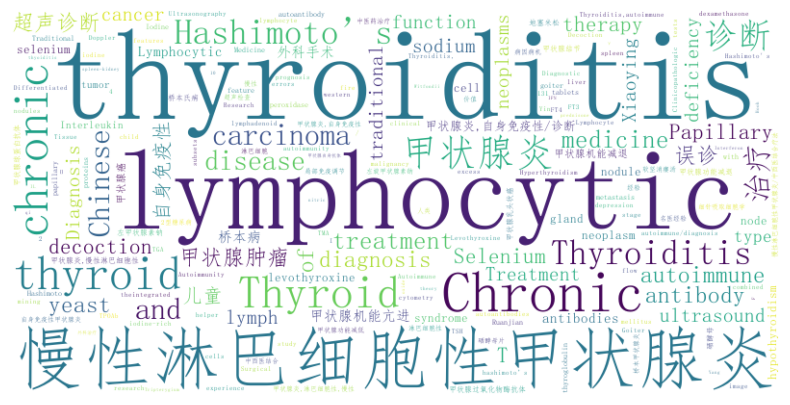

In [94]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 读取CSV文件
file_path = 'papers(whole).csv'
df = pd.read_csv(file_path)

# 提取关键词列并统计频率
keywords = df['Keywords'].dropna().str.replace(';', '').str.split()
all_keywords = [keyword for sublist in keywords for keyword in sublist]
keyword_counts = Counter(all_keywords)

# 上传字体文件后，指定字体路径
uploaded_font_path = r'C:\Windows\Fonts\simfang.ttf'

# 生成词云图
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=uploaded_font_path).generate_from_frequencies(keyword_counts)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [93]:
keywords

0      [Yin, fire, theory, chronic, lymphocytic, thyr...
1                           [慢性淋巴细胞性甲状腺炎, 外科治疗, 甲状腺自身抗体]
2      [thyoiditis, autoimmunity, nitric, oxide, IFN,...
4      [Thyroiditis,, autoimmune, Interleukin, 10, In...
6      [thyroiditis, Tripterygium, Witfondii, Hooh, F...
                             ...                        
350    [Buzhong, Yiqi, decoction, Chronic, lymphocyti...
353                            [慢性淋巴细胞性甲状腺炎, 超声诊断, 影像特征]
358                [慢性淋巴细胞性甲状腺炎, 细针吸取细胞学, 甲状腺功能, 抗甲状腺抗体]
363                                     [桥本甲状腺炎, 碘剂, 造模]
381                         [慢性淋巴细胞性甲状腺炎, 局部免疫调节, 糖皮质激素]
Name: Keywords, Length: 241, dtype: object